# Analysis of the data 

In [2]:
#importing the needed libraries

import pandas as pd
import json
import csv
import xlsxwriter

import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

import warnings
warnings.filterwarnings('ignore')

In [3]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

import seaborn

### Users data for whole Gender Analysis in the Github projects. 

In [4]:
# Extracting the final set of data obtained by doing all the cleaning of data and getting all the information at one place for doing the Analysis further

dataset = pd.read_csv(r"E:\Data\datasets\Main_Users_data.csv");
dataset.head()

,user id,Username,Fullname,Firstname,Lastname,Gender,Company,Company_Size,Start Date,User Type,publc gists,Following,Column8,Column9,Country,City,City2,Full address
0,1014,egranata,Enrico Granata,Enrico,Granata,male,@google,Large,10/24/2015,USR,0,0,-121.955236,37.354108,us,Santa Clara County,Santa Clara,"Santa Clara, CA"
1,1716,mtrienis,Mike Trienis,Mike,Trienis,male,Quickinsights,Large,12/19/2016,USR,0,0,-123.043999,49.281101,ca,BC,Vancouver,Vancouver
2,3181,erszcz,Radek Szymczyszyn,Radek,Szymczyszyn,male,Erlang Solutions,Small,1/26/2016,USR,0,0,19.944980,50.064650,pl,Krak??w County,Krak??w,"Cracow, Poland"
3,5315,smfrench,Steve French,Steve,French\n,male,Microsoft,Large,10/7/2015,USR,0,0,-97.743061,30.267153,us,Travis County,Austin,Austin
4,5919,state-hiu-dev,Humanitarian Information Unit,Humanitarian Information,Unit\n,unknown,U.S. Department of State,Large,8/13/2015,USR,0,0,-77.036871,38.907192,us,District of Columbia,Washington,"Washington, DC"


In [5]:
# Removing the unnecessary data from the dataset

dataset.drop(dataset.index[dataset['Gender'] == 'mostly_female'],axis=0, inplace = True)
dataset.drop(dataset.index[dataset['Gender'] == 'unknown'],axis=0, inplace = True)
dataset.drop(dataset.index[dataset['Gender'] == 'mostly_male'],axis=0, inplace = True)
dataset.dropna()
dataset.head()

,user id,Username,Fullname,Firstname,Lastname,Gender,Company,Company_Size,Start Date,User Type,publc gists,Following,Column8,Column9,Country,City,City2,Full address
0,1014,egranata,Enrico Granata,Enrico,Granata,male,@google,Large,10/24/2015,USR,0,0,-121.955236,37.354108,us,Santa Clara County,Santa Clara,"Santa Clara, CA"
1,1716,mtrienis,Mike Trienis,Mike,Trienis,male,Quickinsights,Large,12/19/2016,USR,0,0,-123.043999,49.281101,ca,BC,Vancouver,Vancouver
2,3181,erszcz,Radek Szymczyszyn,Radek,Szymczyszyn,male,Erlang Solutions,Small,1/26/2016,USR,0,0,19.944980,50.064650,pl,Krak??w County,Krak??w,"Cracow, Poland"
3,5315,smfrench,Steve French,Steve,French\n,male,Microsoft,Large,10/7/2015,USR,0,0,-97.743061,30.267153,us,Travis County,Austin,Austin
6,11501,HAIL9000,Hailee Kenney,Hailee,Kenney\n,female,Bright.md,Small,8/9/2015,USR,0,0,-122.658719,45.512231,us,Multnomah County,Portland,"Portland, OR"


## RQ-1: Male to Female Ratio in Github projects 

In [6]:
#Importing needed liberaries

import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:ylabel='Gender'>

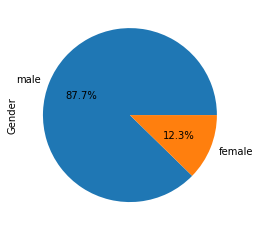

In [7]:
#Male to Female Ratio in Github projects Data visualization

dataset.Gender.value_counts().plot(kind='pie',autopct='%1.1f%%')

In [8]:
#To get the top five companies from the dataset

dataset.Company.value_counts()

Microsoft                                          318
IBM                                                130
Microsoft Corporation                               67
Student                                             65
Google                                              64
                                                  ... 
FixerFIX Electronic Repair                           1
Greyling Studios                                     1
Southport College                                    1
University of Washington School of Oceanography      1
Admiral Group Plc                                    1
Name: Company, Length: 22843, dtype: int64

In [9]:
#Data for top five companies in the dataframe

top_5_companies= ['Microsoft','IBM','Microsoft Corporation','Student','Google']
companies_dataset = dataset.loc[dataset['Company'].isin(top_5_companies)]
companies_dataset

,user id,Username,Fullname,Firstname,Lastname,Gender,Company,Company_Size,Start Date,User Type,publc gists,Following,Column8,Column9,Country,City,City2,Full address
3,5315,smfrench,Steve French,Steve,French\n,male,Microsoft,Large,10/7/2015,USR,0,0,-97.743061,30.267153,us,Travis County,Austin,Austin
57,254667,michael-holzheu,Michael Holzheu,Michael,Holzheu\n,male,IBM,Large,8/22/2015,USR,0,0,9.008830,48.681331,de,B??blingen,B??blingen,B??blingen
161,958907,henrynash,Henry Nash,Henry,Nash\n,male,IBM,Large,3/2/2015,USR,0,0,-2.587910,51.454513,gb,City of Bristol,Bristol,"Bristol, UK"
170,1025081,mlippautz,Michael Lippautz,Michael,Lippautz\n,male,Google,Large,3/8/2015,USR,0,0,11.581981,48.135125,de,Upper Bavaria,Munich,Munich
194,1204375,maheshsal,Mahesh Salgaonkar,Mahesh,Salgaonkar\n,male,IBM,Large,8/22/2015,USR,0,0,77.594563,12.971599,in,Bangalore Urban,Bengaluru,"Bangalore, India."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190096,40523301,JoshJettie,Joshua Jettie,Joshua,Jettie\n,male,Student,Large,8/23/2016,USR,0,0,-79.931602,32.781151,us,SC,Charleston,Charleston SC
191181,41091405,ChrisLopezUK,Luke Stanton,Luke,Stanton\n,male,Microsoft Corporation,Large,11/1/2016,USR,0,0,-0.963010,51.453522,gb,England,Reading,"Reading, UK"
191188,41094065,senthil-rajaram,Brian Quirion,Brian,Quirion\n,male,Microsoft Corporation,Large,8/8/2016,USR,0,0,-122.329453,47.603569,us,WA,Seattle,Seattle
191240,41119304,jpmulhol-ibm,Constantin Munteanu,Constantin,Munteanu\n,male,IBM,Large,2/23/2016,USR,0,0,-77.616318,43.155800,us,NY,Rochester,Rochester


Text(0.5, 1.0, 'Male and Female Ratios in top 5 companies')

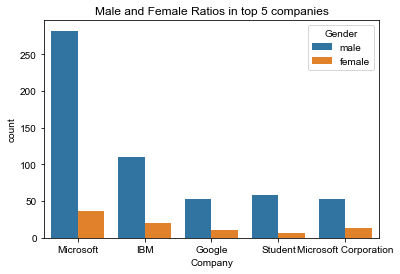

In [10]:
#Top five companies analysis shown by bar chart

sns.countplot(x='Company',hue='Gender',data=companies_dataset)
sns.set(rc={'figure.figsize':(10,10)})
plt.title("Male and Female Ratios in top 5 companies")

# RQ-2: Gender and Project Tenure

In [11]:
# Getting the processed project's dataset for the analysis further

projects_dataset = pd.read_csv(r"E:\Data\DATA_FINAL\Projects_tenure_size_gender_dataset.csv");
projects_dataset.head()

,User_id,Username,Gender,Repo_id,commit_date,Project_size,Project_Tenure
0,376214,VorontsovIE,male,4592,2/25/2015,Small,One Year
1,6836847,jeremiah-de,male,4661,1/21/2016,Small,One Year
2,10159279,mkacherovich,male,15333,11/11/2015,Small,One Year
3,7076783,ajlam,female,25521,10/14/2015,Small,One Year
4,8712122,openx-luis,male,29067,8/12/2015,Small,One Year


In [12]:
projects_dataset.shape

(12562, 7)

In [13]:
#Total data entries in both the tenures figured out from the project.

projects_dataset["Project_Tenure"].value_counts()

One Year     12375
Two Years      187
Name: Project_Tenure, dtype: int64

Text(0.5, 1.0, 'Male and Female Ratios according to Project Tenure')

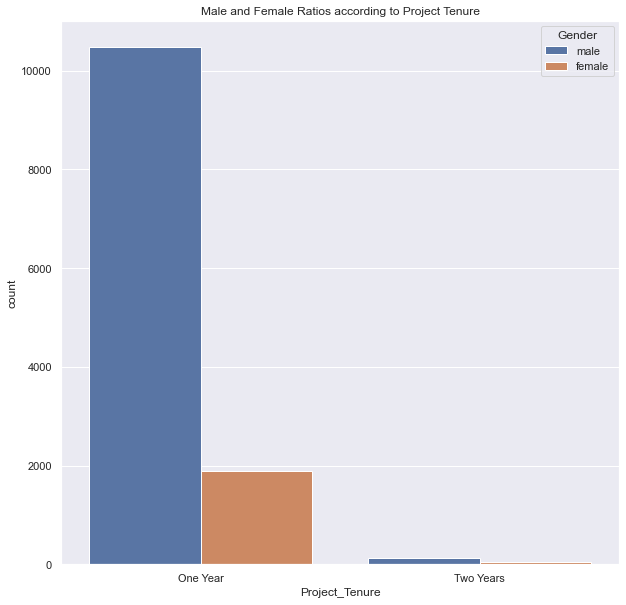

In [14]:
# creating visualization to understand the relation of gender diversity and Project tenure

sns.countplot(x='Project_Tenure',hue='Gender',data=projects_dataset)
sns.set(rc={'figure.figsize':(10,10)})
plt.title("Male and Female Ratios according to Project Tenure")

In [15]:
#data for statistical modelling

projects_dataset_b = pd.read_csv(r"E:\Data\DATA_FINAL\Projects_tenure_size_gender_dataset_b.csv");
projects_dataset_b.head()

,User_id,Username,Gender,Repo_id,commit_date,Project_size,Project_Tenure
0,376214,VorontsovIE,0,4592,2/25/2015,Small,One Year
1,6836847,jeremiah-de,0,4661,1/21/2016,Small,One Year
2,10159279,mkacherovich,0,15333,11/11/2015,Small,One Year
3,7076783,ajlam,1,25521,10/14/2015,Small,One Year
4,8712122,openx-luis,0,29067,8/12/2015,Small,One Year


In [16]:
# Using One-way ANOVA for statistical modelling of the data

mod=ols('Gender ~ Project_Tenure',data=projects_dataset_b).fit()
aov_table=sm.stats.anova_lm(mod, type=2)
print(aov_table)

                     df       sum_sq   mean_sq          F        PR(>F)
Project_Tenure      1.0     3.170031  3.170031  24.349751  8.136716e-07
Residual        12560.0  1635.153882  0.130187        NaN           NaN


In [17]:
#Pearson correlation

projects_dataset.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,User_id,Username,Gender,Repo_id,commit_date,Project_size,Project_Tenure
User_id,1.000000,1.000000,0.025233,0.743954,0.334003,0.002143,0.017853
Username,1.000000,1.000000,0.025233,0.743954,0.334003,0.002143,0.017853
Gender,0.025233,0.025233,1.000000,0.020438,0.007635,0.032137,0.043988
Repo_id,0.743954,0.743954,0.020438,1.000000,0.377233,-0.018317,-0.013793
commit_date,0.334003,0.334003,0.007635,0.377233,1.000000,0.027345,-0.000635
Project_size,0.002143,0.002143,0.032137,-0.018317,0.027345,1.000000,0.758878
Project_Tenure,0.017853,0.017853,0.043988,-0.013793,-0.000635,0.758878,1.000000


<AxesSubplot:>

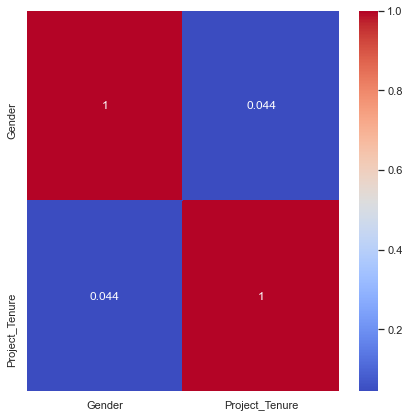

In [18]:
#Heatmap for pearson correlation 

heatmap_data = projects_dataset[['Gender', 'Project_Tenure']].copy()
plt.figure(figsize=(7,7))
seaborn.heatmap(heatmap_data.apply(lambda x: x.factorize()[0]).corr(), annot=True, cmap='coolwarm')

# RQ-3: Gender Diversity and Project Team size

In [19]:
# Getting the processed project's dataset for the analysis further

projects_dataset = pd.read_csv(r"E:\Data\DATA_FINAL\Projects_tenure_size_gender_dataset.csv");
projects_dataset.head()

,User_id,Username,Gender,Repo_id,commit_date,Project_size,Project_Tenure
0,376214,VorontsovIE,male,4592,2/25/2015,Small,One Year
1,6836847,jeremiah-de,male,4661,1/21/2016,Small,One Year
2,10159279,mkacherovich,male,15333,11/11/2015,Small,One Year
3,7076783,ajlam,female,25521,10/14/2015,Small,One Year
4,8712122,openx-luis,male,29067,8/12/2015,Small,One Year


In [20]:
# Total entries for all the project sizes in the dataset

projects_dataset["Project_size"].value_counts()

Small     11933
Middle      469
Large       160
Name: Project_size, dtype: int64

Text(0.5, 1.0, 'Male and Female Ratios according to Team Sizes')

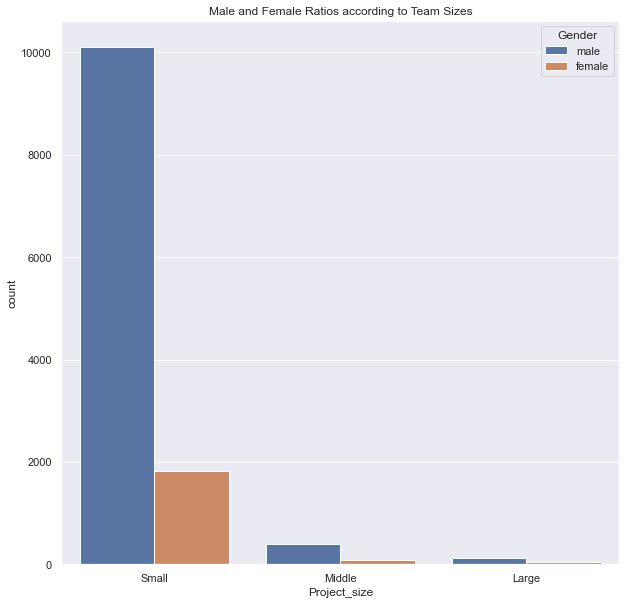

In [21]:
# creating visualization to understand the relation of gender diversity and Team sizes

sns.countplot(x='Project_size',hue='Gender',data=projects_dataset)
sns.set(rc={'figure.figsize':(5,5)})
plt.title("Male and Female Ratios according to Team Sizes")

In [22]:
#For Statistical modeling of data

projects_dataset_b = pd.read_csv(r"E:\Data\DATA_FINAL\Projects_tenure_size_gender_dataset_b.csv");
projects_dataset_b.head()

,User_id,Username,Gender,Repo_id,commit_date,Project_size,Project_Tenure
0,376214,VorontsovIE,0,4592,2/25/2015,Small,One Year
1,6836847,jeremiah-de,0,4661,1/21/2016,Small,One Year
2,10159279,mkacherovich,0,15333,11/11/2015,Small,One Year
3,7076783,ajlam,1,25521,10/14/2015,Small,One Year
4,8712122,openx-luis,0,29067,8/12/2015,Small,One Year


In [23]:
# Using One-way ANOVA for statistical modelling of the data

mod=ols('Gender ~ C(Project_size)',data=projects_dataset_b).fit()
aov_table=sm.stats.anova_lm(mod, type=2)
print(aov_table)

                      df       sum_sq   mean_sq       F    PR(>F)
C(Project_size)      2.0     2.408296  1.204148  9.2443  0.000097
Residual         12559.0  1635.915617  0.130258     NaN       NaN


In [24]:
#Pearson correlation

projects_dataset.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,User_id,Username,Gender,Repo_id,commit_date,Project_size,Project_Tenure
User_id,1.000000,1.000000,0.025233,0.743954,0.334003,0.002143,0.017853
Username,1.000000,1.000000,0.025233,0.743954,0.334003,0.002143,0.017853
Gender,0.025233,0.025233,1.000000,0.020438,0.007635,0.032137,0.043988
Repo_id,0.743954,0.743954,0.020438,1.000000,0.377233,-0.018317,-0.013793
commit_date,0.334003,0.334003,0.007635,0.377233,1.000000,0.027345,-0.000635
Project_size,0.002143,0.002143,0.032137,-0.018317,0.027345,1.000000,0.758878
Project_Tenure,0.017853,0.017853,0.043988,-0.013793,-0.000635,0.758878,1.000000


<AxesSubplot:>

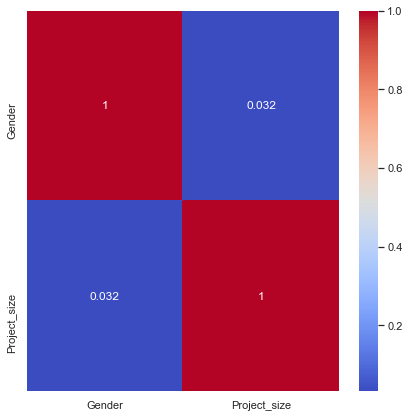

In [25]:
heatmap_data = projects_dataset[['Gender', 'Project_size']].copy()
plt.figure(figsize=(7,7))
seaborn.heatmap(heatmap_data.apply(lambda x: x.factorize()[0]).corr(), annot=True, cmap='coolwarm')